In [1]:
! c:\users\joni\anaconda3\python.exe -m pip install --upgrade pip
! pip install scikit-learn
import pandas as pd
import numpy as np
! python -m pip install sidetable
from scipy.stats import spearmanr
import sidetable 
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
! python -m pip install plotly
import plotly.express as px
from plotly import graph_objects as go 
from pylab import *
import re
import math as mth
from pylab import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from PIL import Image
import plotly.offline as pyoff
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [2]:
! pip install chart_studio
import chart_studio.plotly as py

In [3]:
data = pd.read_csv('C:/Users/Joni/Documents/sorek1.csv')

print(data.head())
data.info()
data.describe()

   site  endangered  protected  wetland  invasive  plant richness  \
0    28           1          2        5         2              33   
1    27           0          1       11         4              37   
2    25           0          2       13         6              50   
3    24           1          1        4         2              54   
4    22           0          1        8         3              59   

   birds richness  nesting birds  birds diversity  
0               4              2             1.24  
1               9              4             2.09  
2               6              4             1.25  
3              10              4             1.99  
4              11              4             2.20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   site             18 non-null     int64  
 1   endangered       18 non-null

,site,endangered,protected,wetland,invasive,plant richness,birds richness,nesting birds,birds diversity
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,17.833333,0.222222,0.833333,7.055556,3.666667,45.000000,9.111111,4.166667,2.003889
std,9.382399,0.427793,0.618347,3.333823,1.571810,18.162664,4.625872,2.121320,0.489539
min,1.000000,0.000000,0.000000,3.000000,1.000000,18.000000,3.000000,1.000000,1.240000
25%,11.250000,0.000000,0.250000,4.250000,3.000000,30.000000,4.500000,3.000000,1.730000
50%,19.000000,0.000000,1.000000,7.000000,4.000000,45.500000,10.000000,4.000000,2.110000
75%,24.750000,0.000000,1.000000,9.500000,4.000000,54.000000,10.000000,5.500000,2.277500
max,32.000000,1.000000,2.000000,13.000000,7.000000,86.000000,19.000000,8.000000,2.630000


In [4]:
data = data.fillna(0)

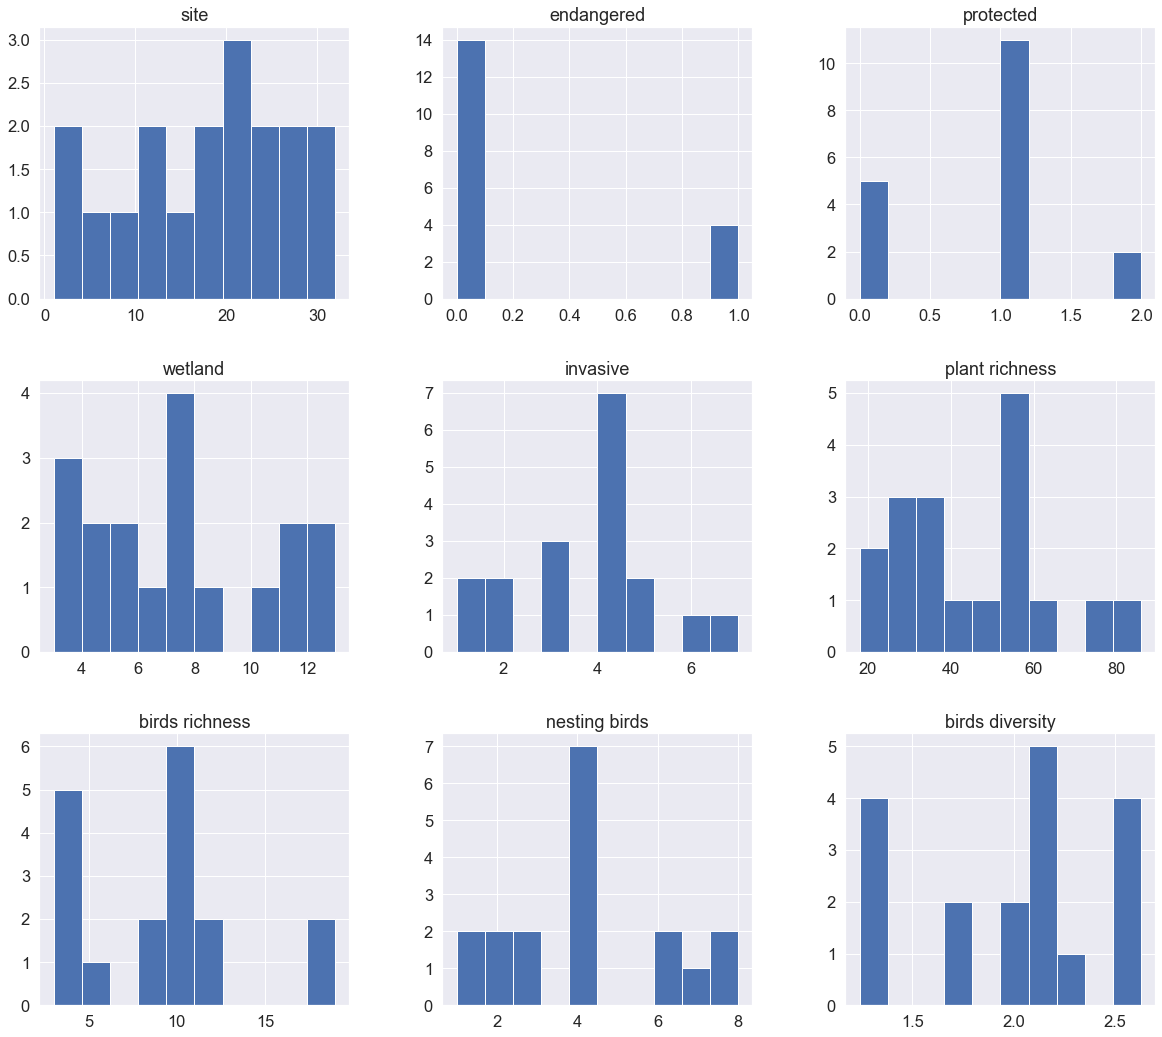

In [5]:
sns.set(rc = {'figure.figsize':(20,18)}, font_scale = 1.5)
data.hist()
plt.show()

In [6]:
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled['site'] = data['site']

In [7]:
x = data.drop(['site'], axis= 1)
kmeans = KMeans(3)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
data_with_clusters['Clusters'] = data_with_clusters['Clusters'].astype('str')

In [22]:
pca = PCA(n_components=2)
components = pca.fit_transform(x)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(
    components, x=0, y=1, color=data_with_clusters['Clusters'], text = data_with_clusters['site'],
    labels={"0": "PC 0 (90.4%)", "1": "PC 1 (5.8%)"},
    category_orders={"color": ["0", "1", "2", "3"]}
)
fig.update_traces(marker=dict(size=20), textposition='top center')
fig.update_layout(legend_title_text='מקבץ')
fig.update_layout(
    height=600,
    title_text=f'שונות מוסברת כוללת: {total_var:.2f}%',
     title_x=0.5
)
fig.show()

In [78]:
! pip install python-bidi
from bidi import algorithm as bidialg
from bidi.algorithm import get_display

In [85]:
pip install --upgrade arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


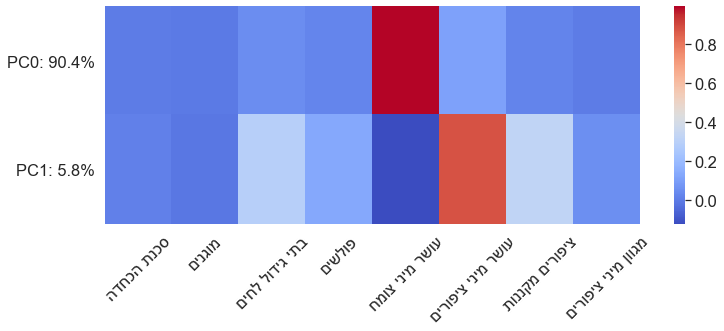

In [108]:
a=pca.explained_variance_ratio_*100
map= pd.DataFrame(pca.components_,columns=data.columns[1:])
text = [get_display('סכנת הכחדה'),
        get_display('מוגנים'),
        get_display('בתי גידול לחים'),
        get_display('פולשים'),
        get_display('עושר מיני צומח'),
        get_display('עושר מיני ציפורים'),
        get_display('ציפורים מקננות'),
        get_display('מגוון מיני ציפורים')]
map.columns = text
y_axis_labels = [f'PC0: {a[0]:.1f}%', f'PC1: {a[1]:.1f}%']
plt.figure(figsize=(12,4))
sns.heatmap(map, yticklabels=y_axis_labels, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [107]:
text

['הדחכה תנכס',
 'םינגומ',
 'םיחל לודיג יתב',
 'םישלופ',
 'חמוצ ינימ רשוע',
 'םירופיצ ינימ רשוע',
 'תוננקמ םירופיצ',
 'םירופיצ ינימ ןווגמ']